## IMPORTING LIBRARIES AND LOADING THE DATA

In [1]:
# importing libaries needed in machine learning

import numpy as np                     #for working with array of numbers 
import pandas as pd                    #for manipulating datasets
import matplotlib.pyplot as plt       #library for plotting graphs in machine learning models
plt.style.use("seaborn-whitegrid")
import seaborn as sns                 #for plotting graphs in machine learning models
%matplotlib inline
import warnings                      #for warnings in machine learning models
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('datasets/oecd.csv')  #load the dataset as Data
df.info()                              #return the dataset information
df.isnull().sum()                      #return the number of rows in the dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   VAR         2976 non-null   object 
 1   Variable    2976 non-null   object 
 2   UNIT        2976 non-null   object 
 3   Measure     2976 non-null   object 
 4   COU         2976 non-null   object 
 5   Country     2976 non-null   object 
 6   YEA         2976 non-null   int64  
 7   Year        2976 non-null   int64  
 8   Value       2976 non-null   float64
 9   Flag Codes  0 non-null      float64
 10  Flags       0 non-null      float64
dtypes: float64(3), int64(2), object(6)
memory usage: 255.9+ KB


VAR              0
Variable         0
UNIT             0
Measure          0
COU              0
Country          0
YEA              0
Year             0
Value            0
Flag Codes    2976
Flags         2976
dtype: int64

In [3]:
df

,VAR,Variable,UNIT,Measure,COU,Country,YEA,Year,Value,Flag Codes,Flags
0,CANCTOCA,Malignant neoplasms,PERCMTTX,Incidence per 100 000 population,AUS,Australia,2002,2002,312.0,NaN,NaN
1,CANCTOCA,Malignant neoplasms,PERCMTTX,Incidence per 100 000 population,AUS,Australia,2008,2008,314.1,NaN,NaN
2,CANCTOCA,Malignant neoplasms,PERCMTTX,Incidence per 100 000 population,AUS,Australia,2012,2012,323.0,NaN,NaN
3,CANCCOLC,Malignant neoplasms of colon,PERCMTTX,Incidence per 100 000 population,AUS,Australia,2002,2002,41.7,NaN,NaN
4,CANCCOLC,Malignant neoplasms of colon,PERCMTTX,Incidence per 100 000 population,AUS,Australia,2008,2008,38.7,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2971,CANCCOLC,Malignant neoplasms of colon,NBPOPIPC,Number of total cases,COL,Colombia,2012,2012,5663.0,NaN,NaN
2972,CANCLUNC,Malignant neoplasms of lung,PERCMTTX,Incidence per 100 000 population,LTU,Lithuania,2012,2012,26.2,NaN,NaN
2973,CANCCOLC,Malignant neoplasms of colon,INCITFTF,Incidence per 100 000 females,LTU,Lithuania,2012,2012,18.9,NaN,NaN
2974,CANCCEIX,Malignant neoplasms of cervix,NBWOMAPF,Number of female cases,LTU,Lithuania,2012,2012,615.0,NaN,NaN


In [4]:
df.shape

(2976, 11)

In [5]:
df.nunique()

VAR              6
Variable         6
UNIT             6
Measure          6
COU             44
Country         44
YEA              4
Year             4
Value         2308
Flag Codes       0
Flags            0
dtype: int64

In [6]:
df.describe(include='all')

,VAR,Variable,UNIT,Measure,COU,Country,YEA,Year,Value,Flag Codes,Flags
count,2976,2976,2976,2976,2976,2976,2976.000000,2976.000000,2.976000e+03,0.0,0.0
unique,6,6,6,6,44,44,NaN,NaN,NaN,NaN,NaN
top,CANCTOCA,Malignant neoplasms,INCITFTF,Incidence per 100 000 females,PRT,Portugal,NaN,NaN,NaN,NaN,NaN
freq,744,744,620,620,96,96,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2006.935484,2006.935484,2.087541e+04,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4.638879,4.638879,1.046346e+05,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,2000.000000,2000.000000,3.100000e+00,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2002.000000,2002.000000,3.905000e+01,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,2008.000000,3.042500e+02,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,2012.000000,6.747250e+03,NaN,NaN


In [7]:
df.duplicated().sum()

0

## DATA ANALYSIS
source from: https://www.kaggle.com/kalilurrahman/oecd-cancer-data-eda-and-visualization/notebook

In [8]:
#Statistical representation of the numerical data.

import plotly.express as px
fig = px.violin(df, x='Variable', y='Country', color='Year')
fig


In [9]:
df = df[df['Measure']!='ALL']
df = df[df['Variable']!='ALL']
fig = px.sunburst(df, path=['Measure','Variable', 'Country'], values='Value', color='Variable', hover_data=['Variable'], color_continuous_scale='RdBu')
fig.show()


In [10]:
fig = px.icicle(df, path=['Measure','Variable', 'Country'], values='Value',
                  color='Variable', hover_data=['Variable'],
                  color_continuous_scale='RdBu',
#                  color_continuous_midpoint=np.average(oecd_cancer_df['Value'], weights=oecd_cancer_df['Variable']
                 )
fig.show()

In [11]:
fig = px.treemap(df, path=['Country', 'Year', 'Variable', 'Value'])
fig

## CORRELATION MATRIX

<AxesSubplot:>

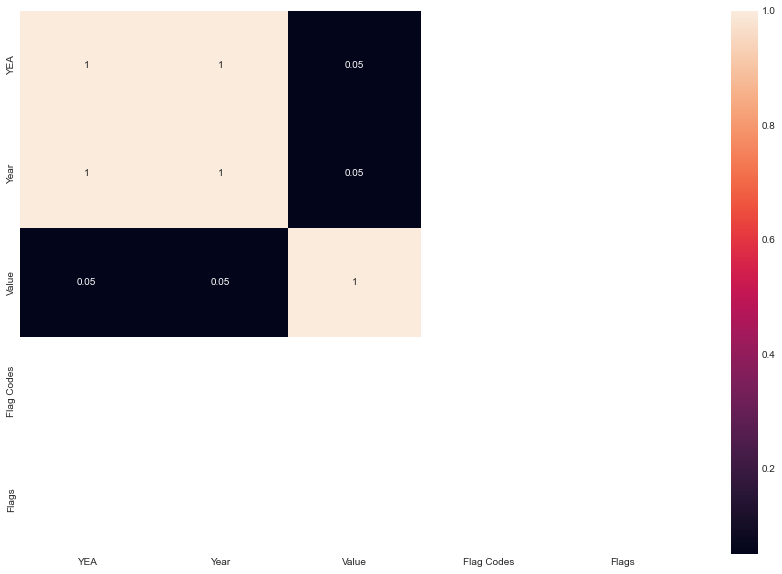

In [12]:
# correlation matrix to find the correlation coefficient between each sample

plt.figure(figsize=(15,10))

#shows the dataset in graphical format
correlation_matrix = df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True)

## PREPROCESSING

In [13]:
# listing the columns in the dataset into values for easy preprocessing 
categ = ['Country','Variable','Measure','Year','Flag Codes','Flags','VAR','COU','UNIT']

#importing LabelEncoder for preproceesing because its good for dropping more than one column in a dataset
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#transforming the dataset (changing the datatypes that contains object to numerical)
df[categ] = df[categ].apply(le.fit_transform)

#dropping the columns thats not needed for modelling
df.drop(['VAR', 'YEA','Flag Codes','Flags','COU','UNIT'],axis=1,inplace=True)

#reseting back the datasets to its original form but with all columns numerical
df.reset_index(drop=True,inplace=True)


In [14]:
df.head()

,Variable,Measure,Country,Year,Value
0,0,2,0,1,312.0
1,0,2,0,2,314.1
2,0,2,0,3,323.0
3,2,2,0,1,41.7
4,2,2,0,2,38.7


## OUTLIERS CHECK

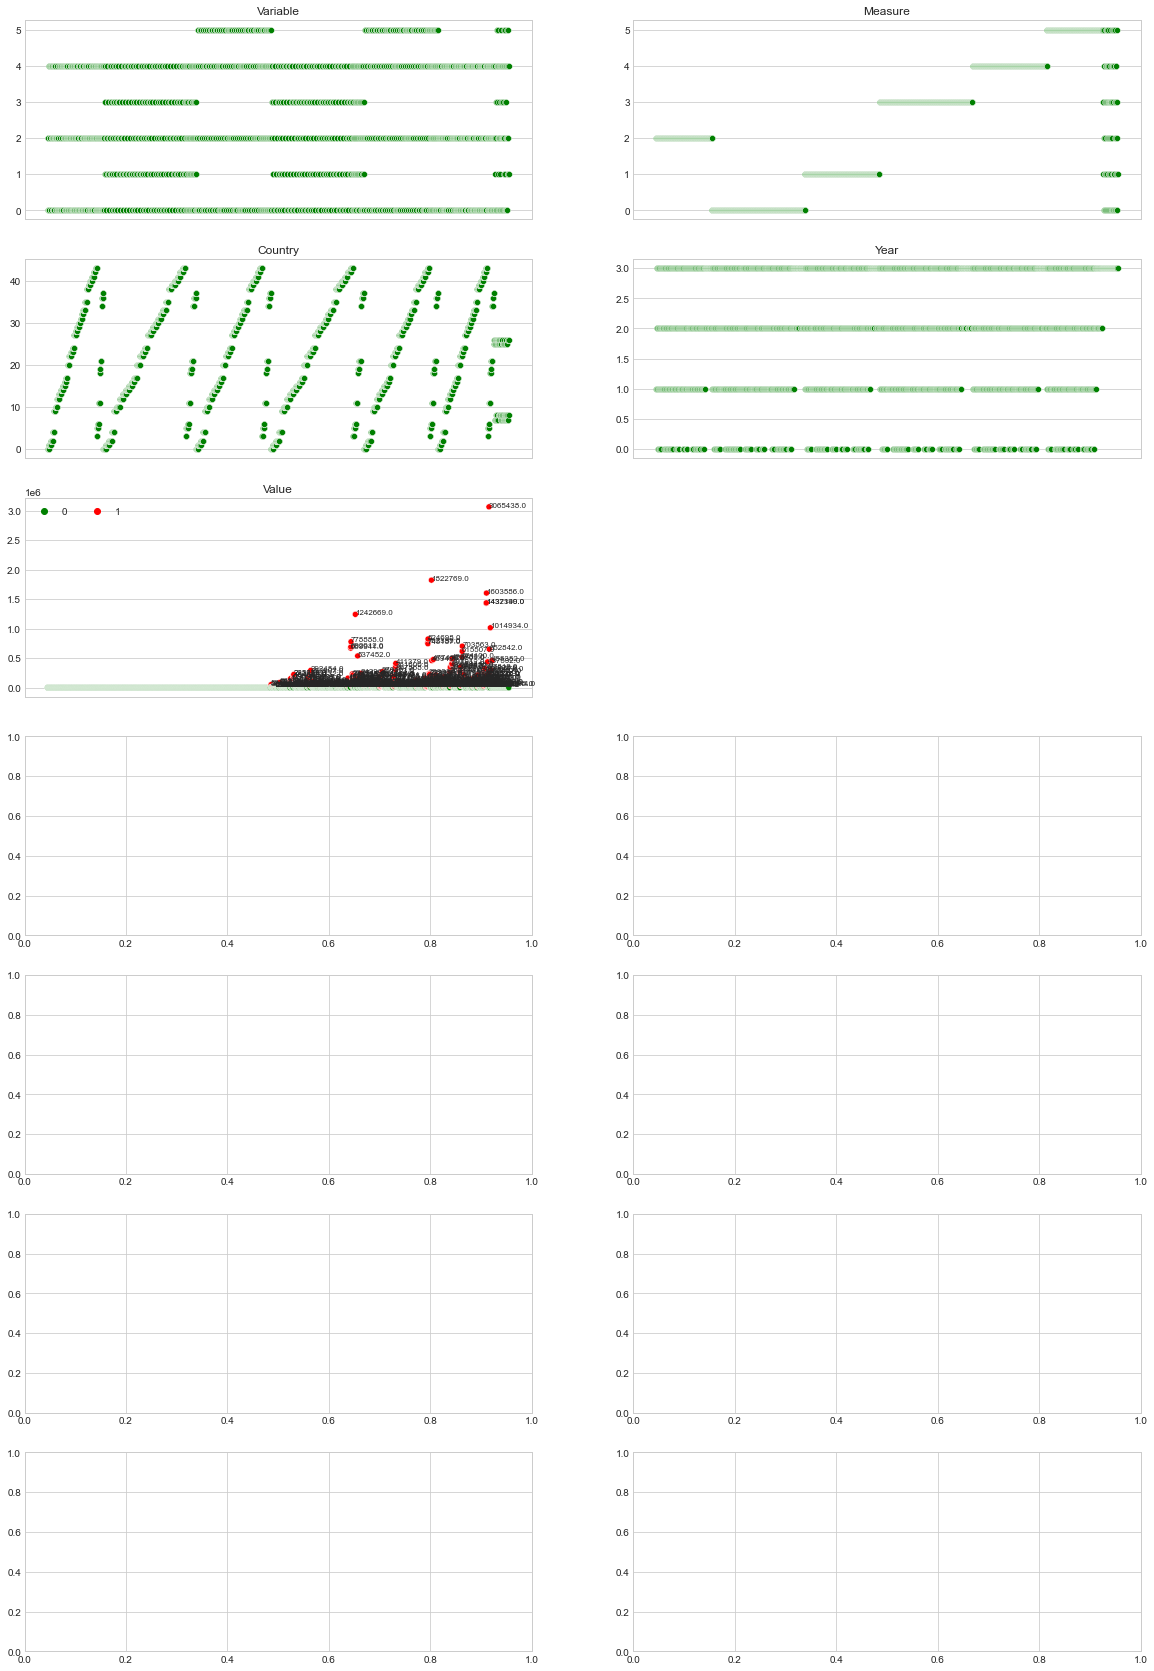

In [15]:
# this function detects outliers using IQR method and returns the scatterplot for the datasets

#source: https://towardsdatascience.com/outlier-detection-methods-in-machine-learning-1c8b7cca6cb8

def iqr_outlier(x,factor):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    min_ = q1 - factor * iqr
    max_ = q3 + factor * iqr
    result_ = pd.Series([0] * len(x))
    result_[((x < min_) | (x > max_))] = 1
    return result_

#SCATTER PLOTS HIGHLIGHTING OUTLIERS CALCULATED USING IQR METHOD
fig, ax = plt.subplots(7, 2, figsize=(20, 30))
row = col = 0
for n,i in enumerate(df.columns):
    if (n % 2 == 0) & (n > 0):
        row += 1
        col = 0
    outliers = iqr_outlier(df[i], 1.5)
   
    if sum(outliers) == 0:
        sns.scatterplot(x = np.arange(len(df[i])), y = df[i], ax = ax[row, col], legend=False, color = 'green')
    else:
        sns.scatterplot(x = np.arange(len(df[i])), y = df[i], ax = ax[row, col], hue = outliers, palette = ['green','red'])
    for x,y in zip(np.arange(len(df[i]))[outliers == 1], df[i][outliers == 1]):
        ax[row,col].text(x = x, y = y, s = y, fontsize = 8)
    ax[row,col].set_ylabel("")
    ax[row,col].set_title(i)
    ax[row,col].xaxis.set_visible(False)
    if sum(outliers) > 0:
        ax[row,col].legend(ncol=2)
    col += 1
ax[row,col].axis('off')
plt.show()

## FEATURE SCALING

In [16]:
# feature scaling for StandardScaler
 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(df.drop('Value',axis=1))
X_train_scaled = pd.DataFrame(X_train_scaled,columns=df.drop('Value',axis=1).columns)
X_train_scaled.head()
#X_train_scaled = sc.transform(X_test)

,Variable,Measure,Country,Year
0,-1.331812,-0.196116,-1.727001,-0.818100
1,-1.331812,-0.196116,-1.727001,0.138923
2,-1.331812,-0.196116,-1.727001,1.095945
3,-0.147979,-0.196116,-1.727001,-0.818100
4,-0.147979,-0.196116,-1.727001,0.138923


In [17]:
df.describe(include='all')

,Variable,Measure,Country,Year,Value
count,2976.000000,2976.000000,2976.000000,2976.000000,2.976000e+03
mean,2.250000,2.333333,22.225806,1.854839,2.087541e+04
std,1.689712,1.699959,12.871756,1.045083,1.046346e+05
min,0.000000,0.000000,0.000000,0.000000,3.100000e+00
25%,0.750000,1.000000,12.000000,1.000000,3.905000e+01
50%,2.000000,2.500000,22.000000,2.000000,3.042500e+02
75%,4.000000,4.000000,33.000000,3.000000,6.747250e+03
max,5.000000,5.000000,43.000000,3.000000,3.065438e+06


In [18]:
df.isnull().sum()

Variable    0
Measure     0
Country     0
Year        0
Value       0
dtype: int64

## SPLITTING THE DATASET FOR TRAINING AND TESTING AND ALSO CREATING VALIDATION SETS

In [19]:
#splitting into independent and dependent variables

X = df.iloc[:,:-1].values
y = df.iloc[:, 1].values

In [20]:
#importing train_test_split to create validation set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=0) #test_size 0.25 means the training data will contain 0.75% of the dataset
#while test contains 0.25% of the dataset

## LOGISTICREGRESSION

In [21]:
# importing LogisticRegression from sklearn for testing and training purposes

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# fitting the model with the data from the training dataset and predicting 
model.fit(X_train,y_train)
score = model.score(X_train, y_train)

# printing out the training score after applying the logistic regression
print("Training score: {:.3f}".format(score))

# defining the model for Testing
score = model.score(X_test, y_test)

# printing out the testing score
print("Testing score:  {:.3f}".format(score))

Training score: 0.807
Testing score:  0.816


In [22]:
# printing the model accuracy for Logistic regression
model = LogisticRegression()
model.fit(X,y)
accuracy = model.score(X,y)
print("Model accuracy:{:.3f}".format(accuracy))

Model accuracy:0.899


## EVALUATION FOR LOGISTICREGRESSION

In [23]:
# Cross validation for Logistic regression model

from sklearn.model_selection import cross_val_score
model = LogisticRegression()
scores = cross_val_score(model, X, y, cv=4, scoring='accuracy')
print(scores)
print("{:.3f}".format(scores.mean()))

[0.6061828  0.7983871  0.87768817 0.83467742]
0.779


In [24]:
#cross validation with r2 metrics

from sklearn.model_selection import cross_val_score
model = LogisticRegression()
scores = cross_val_score(model, X, y, cv=4, scoring='r2')
print(scores)
print("{:.3f}".format(scores.mean()))

[0.81203474 0.92462779 0.95766129 0.94277295]
0.909


<AxesSubplot:>

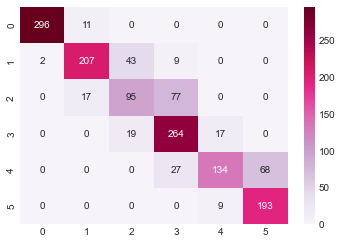

In [25]:
#confusion matrix for logistic regression models

#setting the parameters for model predicted

#importing the model (confusion matrix)
model.fit(X_test,y_test)
y_test_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix

#setting the model parameters for outcome of the test set with the predicted outcome
cfm = confusion_matrix(y_test,y_test_pred)

# using seaborn to predict the outcome of the  test set with the predicted test set
sns.heatmap(cfm,annot=True,cmap='PuRd',fmt='d')

In [26]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,plot_roc_curve
confusion_matrix(y_test, y_test_pred)

array([[296,  11,   0,   0,   0,   0],
       [  2, 207,  43,   9,   0,   0],
       [  0,  17,  95,  77,   0,   0],
       [  0,   0,  19, 264,  17,   0],
       [  0,   0,   0,  27, 134,  68],
       [  0,   0,   0,   0,   9, 193]], dtype=int64)

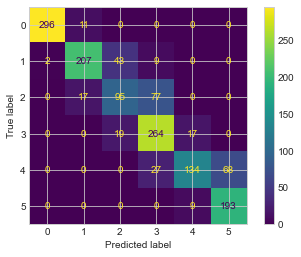

In [27]:
model.fit(X_test, y_test)
plot_confusion_matrix(model, X_test, y_test)

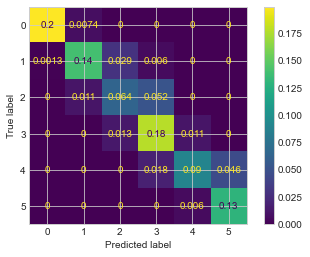

In [28]:
model.fit(X_test, y_test)
plot_confusion_matrix(model, X_test, y_test, normalize = "all")

In [29]:
#classification report for logistic regression models
from sklearn.metrics import classification_report
y_test_pred = model.predict(X_test)
#model.fit(X_test,y_test)
model = LogisticRegression()
cReport = classification_report(y_test,y_test_pred)
print(cReport)

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       307
           1       0.88      0.79      0.83       261
           2       0.61      0.50      0.55       189
           3       0.70      0.88      0.78       300
           4       0.84      0.59      0.69       229
           5       0.74      0.96      0.83       202

    accuracy                           0.80      1488
   macro avg       0.79      0.78      0.78      1488
weighted avg       0.81      0.80      0.79      1488



## TUNNING MODEL

In [30]:
## Grid Search for LogisticRegression

# source: https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/ 

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV      #importing Gridsearch from sklearn library


model = LogisticRegression()                        #setting the model to logistic regression to perform grid search
solvers =['newton-cg', 'lbfgs', 'liblinear']     #setting the solvers parameters
penalty = ['l1', 'l2', 'elasticnet', 'none']                    #setting the penalty for the model to logistic regression to perform grid search
c_values = [100, 10, 1.0]                            #setting the values for the model to logistic regression to perform grid search             
grid = dict(solver=solvers, penalty=penalty, C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_cv = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0) 


grid_result = grid_search_cv.fit(X, y)


print("Best score: %f using %s{:.3f}" %(grid_result.best_score_, grid_result.best_params_))  #prints the best score after grid search has been carried out

Best score: 1.000000 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}{:.3f}


In [31]:
#Random Search for Logistic Regression

from sklearn.model_selection import RandomizedSearchCV      #importing random search model from sklearn library
space = dict()      #initialize dictionary 
result = RandomizedSearchCV(model, space, cv=5, scoring='accuracy', n_iter=10, random_state=5, return_train_score=False)   #setting the parameters 
result.fit(X,y) 
pd.DataFrame(result.cv_results_)[['mean_test_score', 'params']]    
print("Best score: {:.3f}".format(result.best_score_))     #prints the best score
print("Best prameters",result.best_params_)                 #prints the best prameters after RandomSearch

Best score: 0.806
Best prameters {}


## KNEIGBOURS

In [32]:
from sklearn.neighbors import KNeighborsClassifier       #importing KNeighborsClassifier from skleran library for classification
model = KNeighborsClassifier(n_neighbors=4)              #setting up KNeighborsClassifier for classification with 1 neighbors
model.fit(X_train,y_train)                               #fitting model with training 
score = model.score(X_train, y_train)                    #score model with validation 
print("Training score: {:.3f}".format(score))            #output 
score = model.score(X_test, y_test)                      #score model with validation for testing
print("Testing score:  {:.3f}".format(score))            #output  after testing

Training score: 0.876
Testing score:  0.706


In [33]:
from sklearn.neighbors import KNeighborsClassifier        #importing KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4)               #setting models to use with KNeighborsClassifier training and testing
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [34]:
y_test_pred = model.predict(X_test)           # model prediction
print("Predicted values:", y_test_pred)       #prints predicted values for each model 
print("Actual    values:", y_test)            #prints actual values for each model

Predicted values: [5 4 5 ... 4 3 5]
Actual    values: [5 4 4 ... 4 3 5]


In [35]:
accuracy = model.score(X_test,y_test)         # model score for each test
print("Model accuracy:{:.3f}".format(accuracy))     # prints out model accuracy for each test

Model accuracy:0.706


In [36]:
k_range = list(range(1,31))      
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


## EVALUATION MODELS FOR KNEIGHBOURS

In [37]:
from sklearn.model_selection import cross_val_score      # cross validation for KNneigbors
scores = cross_val_score(model, X, y, cv=4,scoring='accuracy')   #setting the parameters
print(scores)                                            # print the scores for the cross validation
print("{:.3f}".format(scores.mean()))

[0.71908602 0.76747312 0.76344086 0.90322581]
0.788


<AxesSubplot:>

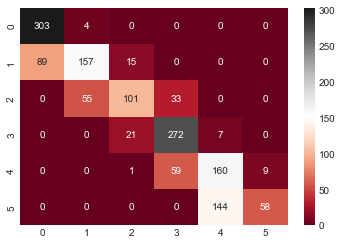

In [38]:
y_test_pred = model.predict(X_test)                       #model fitting for prediction
from sklearn.metrics import confusion_matrix              #prediction confusion matrix for KNeighborsClassifier
cfm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cfm,annot=True,cmap='RdGy',fmt='d')                  #graph for KNeighborsClassifier using heatmap

In [39]:
y_test_pred = model.predict(X_test)                        # model for prediction
from sklearn.metrics import classification_report          #importing the classification report for classification 
cReport = classification_report(y_test,y_test_pred,target_names=None)     #model for prediction 
print(cReport)                                                            #prints out the classification report

              precision    recall  f1-score   support

           0       0.77      0.99      0.87       307
           1       0.73      0.60      0.66       261
           2       0.73      0.53      0.62       189
           3       0.75      0.91      0.82       300
           4       0.51      0.70      0.59       229
           5       0.87      0.29      0.43       202

    accuracy                           0.71      1488
   macro avg       0.73      0.67      0.66      1488
weighted avg       0.73      0.71      0.69      1488



## TUNNING FOR KNEIGHBORS

In [40]:
##Grid Search for KNeighborsClassifier
#source: https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/ 
 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV        #importing GridsearchCV from sklearn.model_selection import
from sklearn.neighbors import KNeighborsClassifier              #importing KNeighborsClassifier from sklearn

model = KNeighborsClassifier()
n_neighbors = range(1, 21, 21)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

grid = dict(n_neighbors=n_neighbors, weights=weights, metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search_cv = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)  #setting the parameters to match the model parameters in the grid search function


grid_result = grid_search_cv.fit(X, y)        #fit the model of the X and y using the grid search function


print("Best: %f using %s" %(grid_result.best_score_, grid_result.best_params_))

Best: 0.724572 using {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


In [41]:
##Random Search for KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV   #importing RandomizedSearchCV from sklearn.model_selection for KNeighborsClassifier

rand = RandomizedSearchCV(model, space, cv=5, scoring='accuracy', n_jobs=-1, n_iter=10, error_score=0, random_state=5, return_train_score=False)
rand.fit(X, y)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'params']]
print('Best score: ', rand.best_score_)                             #prints out the best score 
print('Best params: ', rand.best_params_)                            #prints out the best params

Best score:  0.7581050138176075
Best params:  {}
